# 1. Initial Web Scraping

## Imports

In [198]:
# Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Initialization

In [249]:
# Premier league stats URL
standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

# Using requests library to get the HTML
data = requests.get(standings_url)

# Initializing beutiful soup with the HTML (makes code easier to parse)
bs = BeautifulSoup(data.text)


## Extracting Team (Squad) URLs -> Column 2

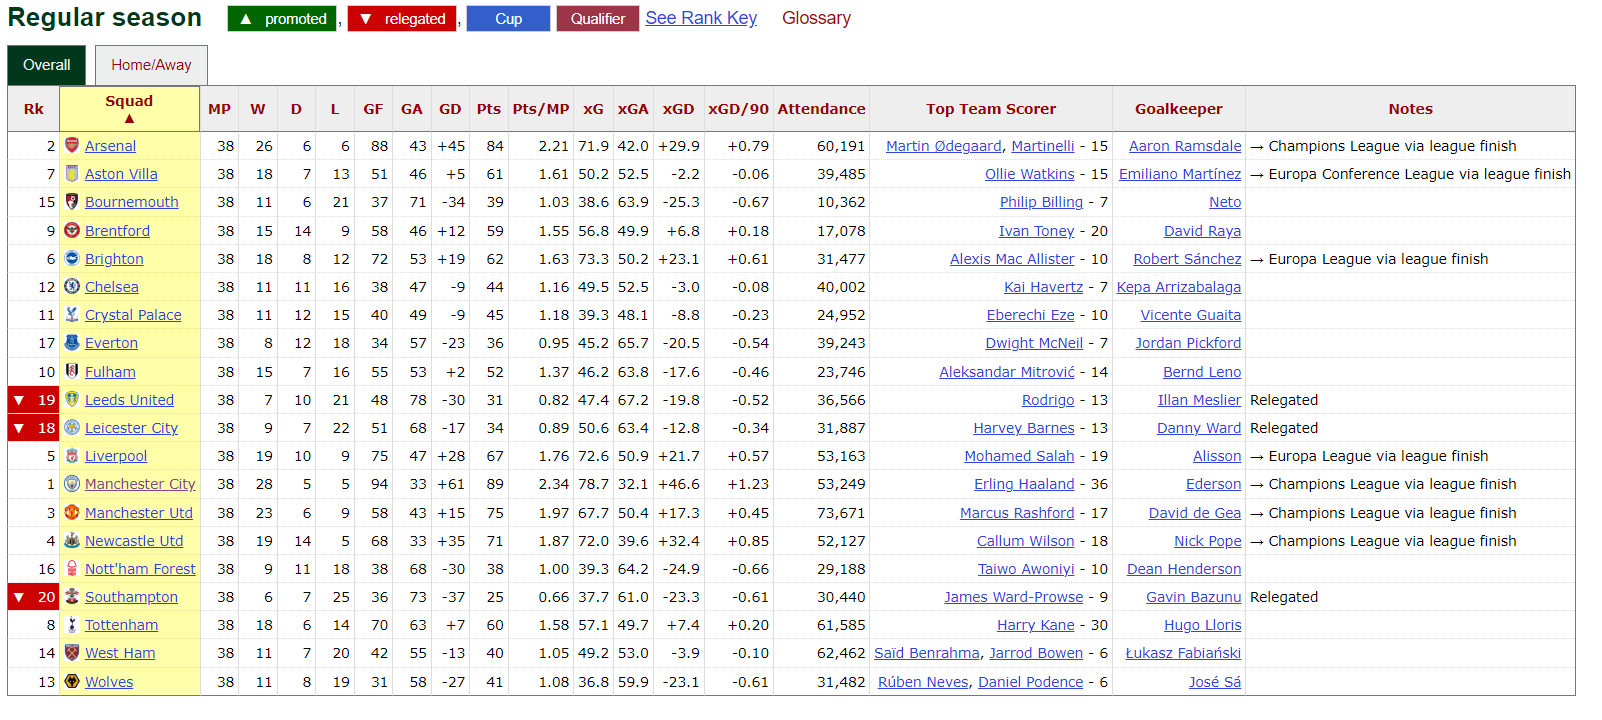

In [200]:
# Selecting the table element (has classname stats_table so table.stats_table is the CSS selector) from the webpage (need the first table i.e index 0)
standings_table = bs.select('table.stats_table')[0]

# Finding and assigning all anchor tags in the table element to links -> returns a list
links = standings_table.find_all('a')

# Getting the href property from all anchor tags and organizing them in a list
links = [a.get('href') for a in links]

# Filtering the links to only get the team links, if '/squads/' isnt in the link then get rid of it
links = [a for a in links if '/squads/' in a]

# Adding the domain names to the beginning for every link (to get the absolute links, not the relative links)
team_urls = [f'https://fbref.com{a}' for a in links]

team_urls

['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/e4a775cb/Nottingham-Forest-Stats',
 'https://fbre

## Extracting Match Stats (Scores & Fixtures Table) for a Team & Turning it into a Pandas Data Frame

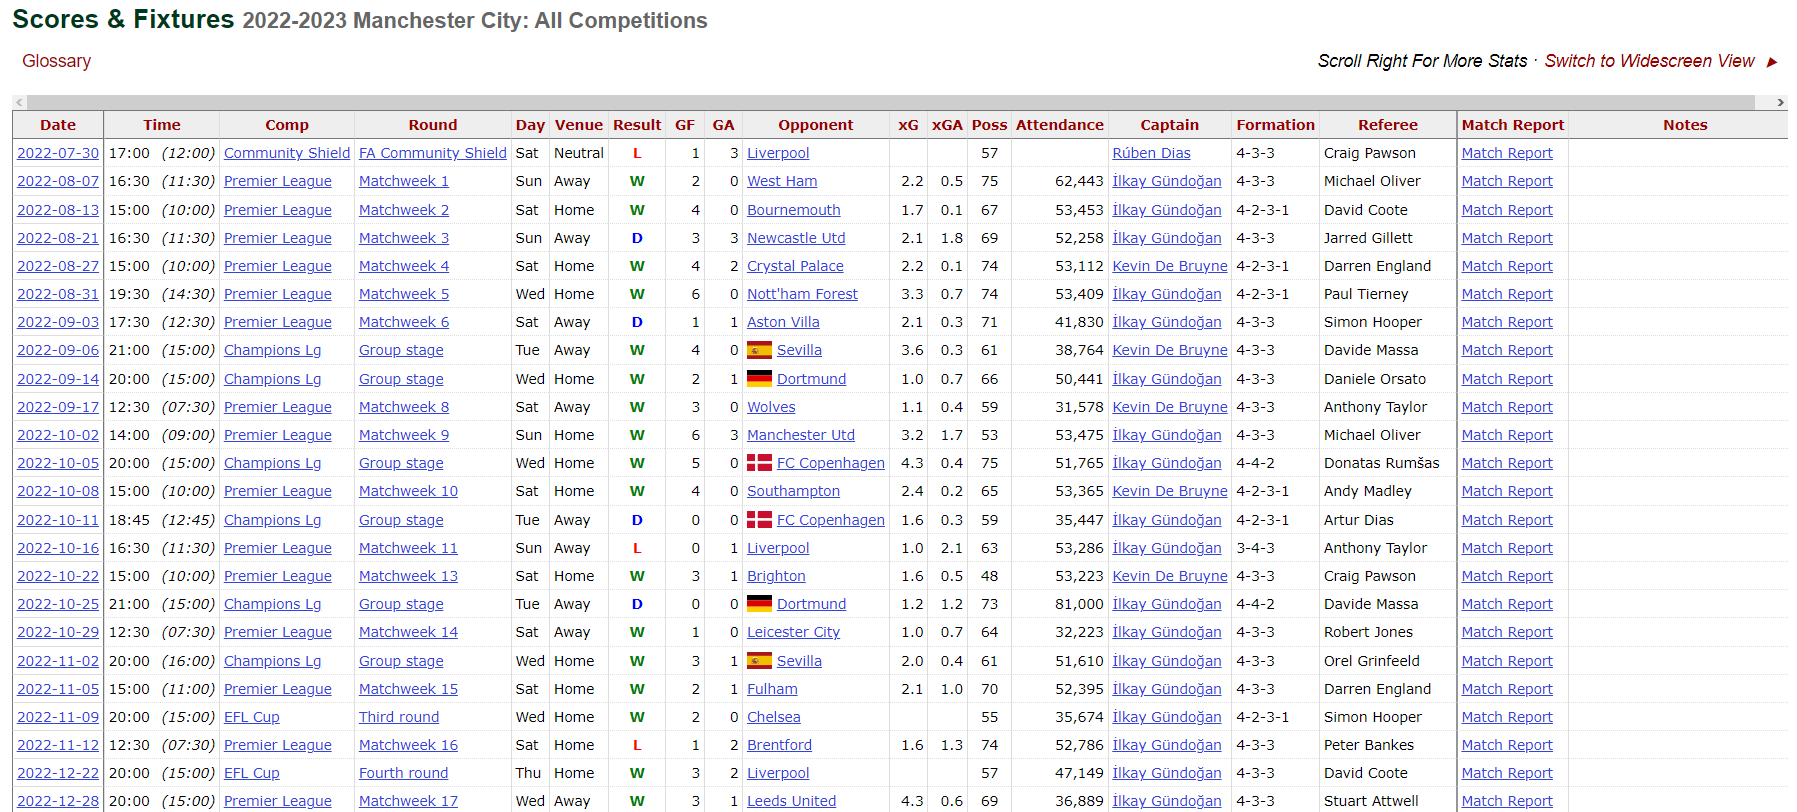

In [201]:
# Getting the HTML from the team URL
data = requests.get(team_urls[0])

# Scanning all table tags and searching for the one that matches the name "Scores & Fixtures"
matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

# Retrieves first 5 columns
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-07-30,17:00,Community Shield,FA Community Shield,Sat,Neutral,L,1,3,Liverpool,NaN,NaN,57,NaN,Rúben Dias,4-3-3,Craig Pawson,Match Report,NaN
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,2.2,0.5,75,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,1.7,0.1,67,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,2.1,1.8,69,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,2.2,0.1,74,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN


## Extracting Shooting Stats (Shooting Table) for a Team & Turning it into a Pandas Data Frame

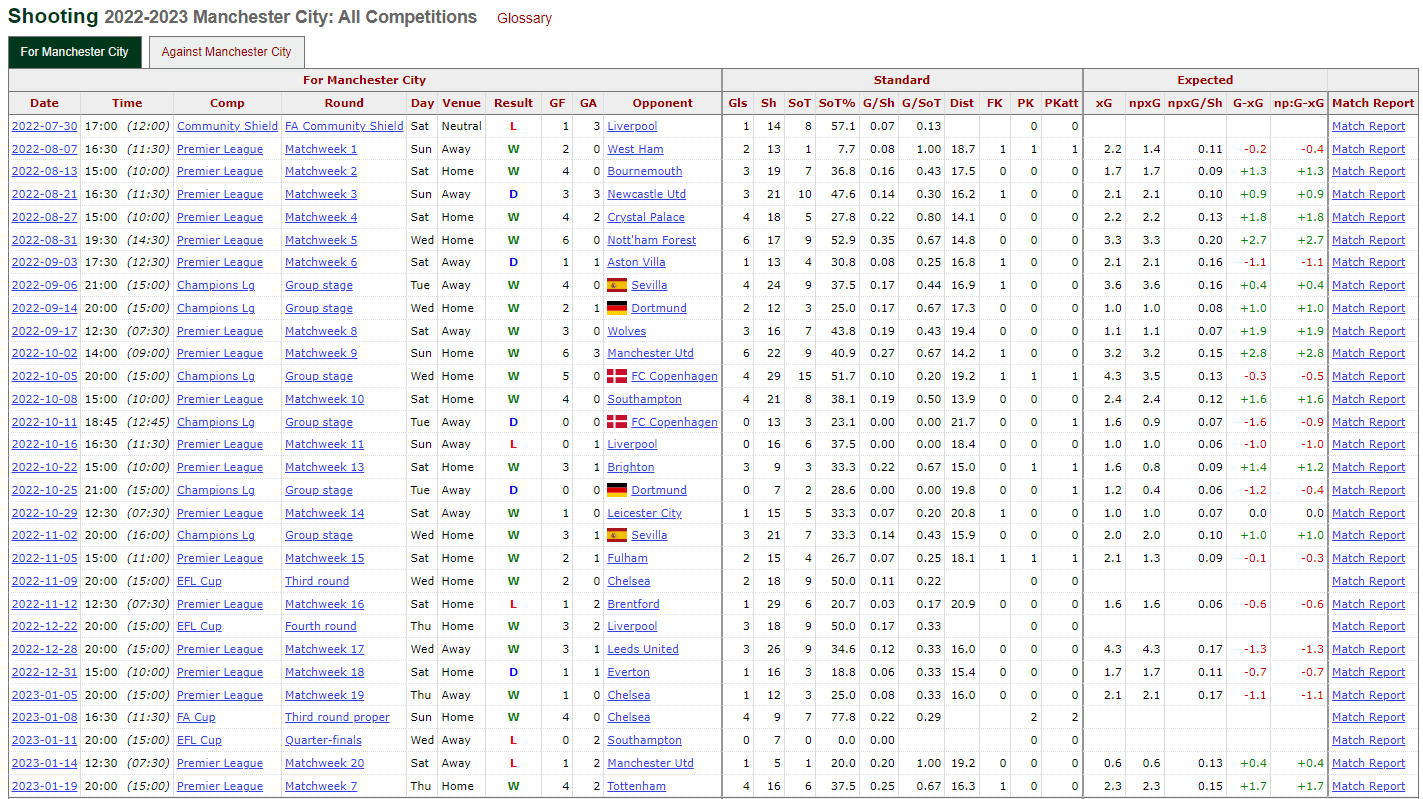

In [202]:
# Initializing beautiful soup for the match stats page
bs = BeautifulSoup(data.text)

# Finding all anchor tags
links = bs.find_all('a')

# Extracting href of all anchor tags and putting them in a list
links = [a.get("href") for a in links]

# only getting the link thats associated with the shooting page
links = [a for a in links if a and 'all_comps/shooting/' in a]

# Extracting the HTMl from the shooting page
data = requests.get(f"https://fbref.com{links[0]}")

# Scanning all table tags and searching for the one that matches the name "Shooting"
shooting = pd.read_html(data.text, match='Shooting')[0]

# Removing the upper level index (currently have 2 index levels so need to drop a level for better and easier formatting and access) 
shooting.columns = shooting.columns.droplevel() 

# Removing the multi level index makes it possible to retrieve data like Shooting['Date']

# Retrives first 5 columns
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2022-07-30,17:00,Community Shield,FA Community Shield,Sat,Neutral,L,1,3,Liverpool,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,18.7,1.0,1,1,2.2,1.4,0.11,-0.2,-0.4,Match Report
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,17.5,0.0,0,0,1.7,1.7,0.09,1.3,1.3,Match Report
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,16.2,1.0,0,0,2.1,2.1,0.10,0.9,0.9,Match Report
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,14.1,0.0,0,0,2.2,2.2,0.13,1.8,1.8,Match Report


## Cleaning & Merging Scraped Data

In [203]:
# Merges the match data with the shooting data based on the dates
team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

team_data.head()

# To double check if both data frames are the same size
# matches.shape
# shooting.shape


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2022-07-30,17:00,Community Shield,FA Community Shield,Sat,Neutral,L,1,3,Liverpool,...,4-3-3,Craig Pawson,Match Report,NaN,14,8,NaN,NaN,0,0
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,4-3-3,Michael Oliver,Match Report,NaN,13,1,18.7,1.0,1,1
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,4-2-3-1,David Coote,Match Report,NaN,19,7,17.5,0.0,0,0
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,4-3-3,Jarred Gillett,Match Report,NaN,21,10,16.2,1.0,0,0
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,4-2-3-1,Darren England,Match Report,NaN,18,5,14.1,0.0,0,0


# =============================================================

# 2. (Upscaling) Web Scraping Data For Multiple Seasons + All Teams

## Extracting Data for Multiple Seasons and Teams and Putting Them in One Data Frame

In [204]:
# Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# List of years/seasons to be scraped
years = list(range(2023, 2021, -1))

# List of data frames
all_matches = []

standings_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

for year in years:
    # Getting HTML Data for standings page
    data = requests.get(standings_url)
    bs = BeautifulSoup(data.text)
    
    # Extracting Team URLs
    standings_table = bs.select('table.stats_table')[0]
    links = [a.get('href') for a in standings_table.find_all('a')]
    links = [a for a in links if '/squads/' in a]
    team_urls = [f'https://fbref.com{a}' for a in links]
    
    # Re-asssigning standings_url to that of the previous season to be able to download html of previous seasons and get data for previous seasons 
    previous_season = bs.select("a.prev")[0].get('href')
    standings_url = f'https://fbref.com{previous_season}'
    
    # Looping through each team url and scraping match stats + shooting stats for each team
    for team_url in team_urls:
        
        # Extracting Team Name (Splits the url from the '/' then takes the last index, replaces -Stats with nothing and then replaces - with a space)
        team_name = team_url.split('/')[-1].replace('-Stats', '').replace('-', ' ')
        
        # Getting HTMl data for match stats page and converting to pandas data frame
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        
        # Getting HTML data for Shooting stats page and converting to pandas data frame
        bs = BeautifulSoup(data.text)
        links = [a.get("href") for a in bs.find_all('a')]
        links = [a for a in links if a and 'all_comps/shooting/' in a]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match='Shooting')[0]
        shooting.columns = shooting.columns.droplevel() 
        
        # Merging shooting stats with match stats
            # Using try-excpept since sometimes the shooting stats arent available for a team and if thats the case and merging I get a ValueError. In this case ignore the team and continue
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        # Skipping over any team where shooting stats arent available
        except ValueError:
            continue
            
        # Filtering to only get team data for premier league matches (i.e excludes community shield and champions league)
        team_data = team_data[team_data["Comp"] == "Premier League"]
        # Adding columns for season and team to preserve the info on the page but is not in the table and to distinguish between teams and the seasons
        team_data["Season"] = year
        team_data["Team"] = team_name
        
        all_matches.append(team_data)
        # Might have to change depending on how fbref responds to the web scraping
        time.sleep(5)

## Combining All Individual Data Frames Into 1 Data Frame

In [205]:
# Combining all individual data frames into 1 data frame
match_df = pd.concat(all_matches)

match_df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0,2,Aston Villa,...,Match Report,NaN,9.0,3.0,21.6,0.0,0.0,0.0,2022,Norwich City
39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0,4,West Ham,...,Match Report,NaN,8.0,2.0,22.2,1.0,0.0,0.0,2022,Norwich City
40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0,3,Leicester City,...,Match Report,NaN,9.0,5.0,17.0,0.0,0.0,0.0,2022,Norwich City
41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1,1,Wolves,...,Match Report,NaN,11.0,2.0,14.4,0.0,0.0,0.0,2022,Norwich City


## Writing to .csv File

In [206]:
# Writing to a csv using pandas to csv method
match_df.to_csv("matches.csv")

# =============================================================

# 3. Preliminary Steps for Machine Learning

## Reading .csv File

In [207]:
import pandas as pd

# Reading the csv and specifiying first column is the index column
matches = pd.read_csv("matches.csv", index_col=0)

matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


## Investigating Possibiltiy of Missing Data

In [208]:
expected_games = 38*20*2
retrieved_games = matches.shape

print("========== Investigation 1 ==========")
print("Expected: Actual Number of Games = 38 Games * 20 teams * 2 Seasons (2021-2022 and 2022-2023) = ", expected_games )
print("Retrieved: ", retrieved_games)

if (expected_games == retrieved_games[0]):
    print("Expected Games = Retrieved Games. First step in investigation complete")
    
    

# 6 Teams should have 38 games (because of relegation) and the other 17 should have 76 games (Should be a total of 23 teams)
print("\n========== Investigation 2 ==========")
correct_num_games = []
num_teams = 23
non_relegation_team_games = 76
relegation_team_games = 38

for i in range(len(matches["Team"].value_counts())):
    if (i < 17 and matches["Team"].value_counts()[i] == non_relegation_team_games):
        correct_num_games.append("Check")
              
    elif (i >= 17 and matches["Team"].value_counts()[i] == relegation_team_games):
        correct_num_games.append("Check")
        
print(matches["Team"].value_counts())

if (len(correct_num_games) == num_teams):
    print("Correct Number of Games. Second step in investigation complete")
    
    
    
print("\n========== Investigation 3 ==========")
correct_num_matchweek_games = []
num_matchweek_games = 40
num_matchweeks = 38

# Each matchweek has 20 games * for 2 seasons = 40 games per matchweek
for i in range(len(matches["Round"].value_counts())):
    if(matches["Round"].value_counts()[i] == num_matchweek_games):
        correct_num_matchweek_games.append("Check")
        
print(matches["Round"].value_counts())

if (len(correct_num_matchweek_games) == num_matchweeks):
    print("Correct Number of Games. Third step in investigation complete")

========== Investigation 1 ==========
Expected: Actual Number of Games = 38 Games * 20 teams * 2 Seasons (2021-2022 and 2022-2023) =  1520
Retrieved:  (1520, 27)
Expected Games = Retrieved Games. First step in investigation complete

========== Investigation 2 ==========
Manchester City             76
Crystal Palace              76
Southampton                 76
Leeds United                76
Leicester City              76
Everton                     76
West Ham United             76
Wolverhampton Wanderers     76
Arsenal                     76
Chelsea                     76
Brentford                   76
Tottenham Hotspur           76
Aston Villa                 76
Brighton and Hove Albion    76
Liverpool                   76
Newcastle United            76
Manchester United           76
Fulham                      38
Bournemouth                 38
Nottingham Forest           38
Burnley                     38
Watford                     38
Norwich City                38
Name: Team, dty

## Cleaning Data (Converting Necessary Objects to Numeric Data + Removing Unnecessary Data)

In [209]:
# Converts date column to datetime64 from object and then overwrites the current date column
matches["Date"] = pd.to_datetime(matches["Date"])

# Delete these columns
del matches["Comp"]
del matches["Notes"]

matches.dtypes

Date            datetime64[ns]
Time                    object
Round                   object
Day                     object
Venue                   object
Result                  object
GF                       int64
GA                       int64
Opponent                object
xG                     float64
xGA                    float64
Poss                   float64
Attendance             float64
Captain                 object
Formation               object
Referee                 object
Match Report            object
Sh                     float64
SoT                    float64
Dist                   float64
FK                     float64
PK                     float64
PKatt                  float64
Season                   int64
Team                    object
dtype: object

## Creating Predictors For Machine Learning

In [210]:
# Converts venue data into numeric data by assinging numeric values to home and away games (converts from strings into categories and then converts categories to numbers)
matches["Venue_code"] = matches["Venue"].astype("category").cat.codes

# Converts the opponents data into a numeric data by assigning each opponent their own code
matches["Opp_code"] = matches["Opponent"].astype("category").cat.codes

# Converts the time data to an integer that just provides the hour (replaces regex with empty string. regex is a colon followed by 1 or more characters)
matches["Hour"] = matches["Time"].str.replace(":.+", "", regex=True).astype('int')

# Converts the date into a day code which gives a number for each day of the week
matches["Day_code"] = matches["Date"].dt.dayofweek

# Converts the result of the game to a numeric value (Win is 1 and loss or draw is 0) 
matches["Target"] = (matches["Result"] == "W").astype("int")

# Can make it so that win is 2, lose is 1 and draw is 0
# matches["Target"] = matches["Result"].astype("category").cat.codes

matches

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,FK,PK,PKatt,Season,Team,Venue_code,Opp_code,Hour,Day_code,Target
1,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2,0,West Ham,2.2,...,1.0,1.0,1.0,2023,Manchester City,0,21,16,6,1
2,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4,0,Bournemouth,1.7,...,0.0,0.0,0.0,2023,Manchester City,1,2,15,5,1
3,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3,3,Newcastle Utd,2.1,...,1.0,0.0,0.0,2023,Manchester City,0,15,16,6,0
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,2.2,...,0.0,0.0,0.0,2023,Manchester City,1,7,15,5,1
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,3.3,...,0.0,0.0,0.0,2023,Manchester City,1,17,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2022-04-30,15:00,Matchweek 35,Sat,Away,L,0,2,Aston Villa,0.5,...,0.0,0.0,0.0,2022,Norwich City,0,1,15,5,0
39,2022-05-08,14:00,Matchweek 36,Sun,Home,L,0,4,West Ham,0.8,...,1.0,0.0,0.0,2022,Norwich City,1,21,14,6,0
40,2022-05-11,19:45,Matchweek 21,Wed,Away,L,0,3,Leicester City,1.1,...,0.0,0.0,0.0,2022,Norwich City,0,11,19,2,0
41,2022-05-15,14:00,Matchweek 37,Sun,Away,D,1,1,Wolves,1.1,...,0.0,0.0,0.0,2022,Norwich City,0,22,14,6,0


# =============================================================

# 4. Training Initial Machine Learning Model

## Initialization

In [211]:
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest Classifier 
# n_estimators: number of individual decision trees we want to train: higher number => longer algorithm running time but potentially increased accuracy
# min_samples_split: number of samples we want to have in a leaf of a decision tree before we split the node
# random_state: makes it so that if we run the random forest multiple times the result will be the same as long as the data hasnt changed
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)



## Splitting Training and Test Data Sets

In [212]:
# Training data will include all games prior to beginning of 2023 (includes all columns with dates prior to start of 2023)
train = matches[matches["Date"] < "2023-01-01"]

# Test data will include all games post beginning of 2023
test = matches[matches["Date"] > "2023-01-01"]

## Fitting Random Forrest Model

In [213]:
# List of predictors
predictors = ["Venue_code", "Opp_code", "Hour", "Day_code"]

# Trains random forrest model with these predictors trying to predict the target
rf.fit(train[predictors], train["Target"])

# Generating predictions using the predict method and passing in the test data with the predictors
preds = rf.predict(test[predictors])


## Checking Prediction Accuracy

In [214]:
from sklearn.metrics import accuracy_score

# Passing in actual and predictions 
acc = accuracy_score(test["Target"], preds)

# Percentage of time prediction was accurate
acc

0.5981308411214953

## Organizing Accuracy Data Into Table for Easy Analysis

In [215]:
# Creating dataframe that combines actual values and predicted values
combined = pd.DataFrame(dict(actual=test["Target"], predicted=preds))

# Creating crosstab for easy analysis
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,203,60
1,112,53


## Checking Precision Accuracy

In [216]:
from sklearn.metrics import precision_score

# Checking that when a win was predicted what percentage of the time did the team actually win
precision_score(test["Target"], preds)

0.4690265486725664

# =============================================================

# 5. Improving Precision of Model With Rolling Averages For a Single Team

## Splitting Matches Data Frame by Team

In [217]:
# Creates 1 data frame for every team in the data
grouped_matches = matches.groupby("Team")

# Gives single group from data (all matches the team played in)
group = grouped_matches.get_group("Manchester United")

group

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,FK,PK,PKatt,Season,Team,Venue_code,Opp_code,Hour,Day_code,Target
0,2022-08-07,14:00,Matchweek 1,Sun,Home,L,1,2,Brighton,1.4,...,0.0,0.0,0.0,2023,Manchester United,1,4,14,6,0
1,2022-08-13,17:30,Matchweek 2,Sat,Away,L,0,4,Brentford,0.9,...,0.0,0.0,0.0,2023,Manchester United,0,3,17,5,0
2,2022-08-22,20:00,Matchweek 3,Mon,Home,W,2,1,Liverpool,1.8,...,2.0,0.0,0.0,2023,Manchester United,1,12,20,0,1
3,2022-08-27,12:30,Matchweek 4,Sat,Away,W,1,0,Southampton,1.1,...,1.0,0.0,0.0,2023,Manchester United,0,18,12,5,1
4,2022-09-01,20:00,Matchweek 5,Thu,Away,W,1,0,Leicester City,1.5,...,0.0,0.0,0.0,2023,Manchester United,0,11,20,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2022-04-23,12:30,Matchweek 34,Sat,Away,L,1,3,Arsenal,1.8,...,0.0,0.0,1.0,2022,Manchester United,0,0,12,5,0
45,2022-04-28,19:45,Matchweek 37,Thu,Home,D,1,1,Chelsea,0.5,...,0.0,0.0,0.0,2022,Manchester United,1,6,19,3,0
46,2022-05-02,20:00,Matchweek 35,Mon,Home,W,3,0,Brentford,2.0,...,1.0,1.0,1.0,2022,Manchester United,1,3,20,0,1
47,2022-05-07,17:30,Matchweek 36,Sat,Away,L,0,4,Brighton,0.9,...,1.0,0.0,0.0,2022,Manchester United,0,4,17,5,0


## Defining Columns List

In [218]:
# Colums we want to compute rolling averages for
cols = ["xG", "xGA", "GF", "GA", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]

# New Columns that store the data for rolling averages
new_cols = [f"{c}_rolling" for c in cols]

new_cols

['xG_rolling',
 'xGA_rolling',
 'GF_rolling',
 'GA_rolling',
 'Sh_rolling',
 'SoT_rolling',
 'Dist_rolling',
 'FK_rolling',
 'PK_rolling',
 'PKatt_rolling']

## Computing Rolling Averages

In [219]:
def rolling_averages(group, cols, new_cols):
    # Sorting group by ascending order of date so we can look at last couple matches team played to see what their performance is like 
    group = group.sort_values("Date")
    
    # using 3 as the number of matchweeks we use to compute rolling averages (i.e using previous 3 matchweek data to predict 4th matchweek result)
    # closed='left' ensures that current matchweek average isnt included in the current matchweek data (takes current week out when doing rolling averages)
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    
    # Assigning the rolling stats back to the original data frame with new names
    group[new_cols] = rolling_stats
    
    # Dropping any missing values (For instance if you're in matchweek 2 you dont have 3 previous matches to get data from)
    group = group.dropna(subset=new_cols)
    
    return group

# group: manchester united (from previous cell)
# cols: defined in previous cell
# new_cols: defined in previous cell

rolling_averages(group, cols, new_cols)

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,xG_rolling,xGA_rolling,GF_rolling,GA_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling
3,2021-09-11,15:00,Matchweek 4,Sat,Home,W,4,1,Newcastle Utd,2.5,...,1.300000,1.100000,2.333333,0.666667,13.666667,4.666667,17.366667,0.666667,0.000000,0.000000
5,2021-09-19,14:00,Matchweek 5,Sun,Away,W,2,1,West Ham,2.0,...,1.633333,1.066667,2.000000,0.666667,15.333333,4.000000,18.133333,0.666667,0.000000,0.000000
7,2021-09-25,12:30,Matchweek 6,Sat,Home,L,0,1,Aston Villa,2.2,...,1.700000,1.366667,2.333333,0.666667,16.000000,6.333333,18.800000,0.333333,0.000000,0.000000
9,2021-10-02,12:30,Matchweek 7,Sat,Home,D,1,1,Everton,1.0,...,2.233333,1.000000,2.000000,1.000000,21.666667,6.666667,19.100000,0.666667,0.000000,0.333333
10,2021-10-16,15:00,Matchweek 8,Sat,Away,L,2,4,Leicester City,1.2,...,1.733333,1.300000,1.000000,1.000000,19.000000,6.666667,17.300000,0.666667,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023-05-07,19:00,Matchweek 35,Sun,Away,L,0,1,West Ham,1.2,...,1.533333,1.800000,1.000000,1.000000,15.666667,6.000000,18.466667,1.000000,0.000000,0.000000
57,2023-05-13,15:00,Matchweek 36,Sat,Home,W,2,0,Wolves,3.2,...,1.266667,1.400000,0.333333,0.666667,16.333333,5.000000,18.566667,0.333333,0.000000,0.000000
58,2023-05-20,15:00,Matchweek 37,Sat,Away,W,1,0,Bournemouth,1.4,...,1.933333,1.300000,0.666667,0.666667,20.666667,6.000000,18.666667,1.000000,0.000000,0.000000
59,2023-05-25,20:00,Matchweek 32,Thu,Home,W,4,1,Chelsea,5.2,...,1.933333,0.866667,1.000000,0.333333,22.000000,6.000000,18.733333,0.666667,0.000000,0.000000


# =============================================================

# 6. (Upscaling) Improving Precision of Model With Rolling Averages For Every Team

## Applying Rolling Average Function to Each Team

In [220]:
# Took oringial matches data frame and grouped it by team (which creates 1 data frame for every team in data)
# Applied rolling_average function to each of those teams in the data to compute the rolling averages
matches_rolling = matches.groupby("Team").apply(lambda team: rolling_averages(team, cols, new_cols))

# Dropping 1 index level (Each team name is a seperate level, which gives it an extra index level which we dont need)
matches_rolling = matches_rolling.droplevel('Team')

# Making indices unique (A lot of indces are being repeated but we want each index to be uniqley defined)
matches_rolling.index = range(matches_rolling.shape[0])

matches_rolling

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,xG_rolling,xGA_rolling,GF_rolling,GA_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling
0,2021-09-11,15:00,Matchweek 4,Sat,Home,W,1,0,Norwich City,2.7,...,0.600000,2.900000,0.000000,3.000000,9.666667,2.333333,14.833333,0.333333,0.000000,0.000000
1,2021-09-18,15:00,Matchweek 5,Sat,Away,W,1,0,Burnley,1.1,...,1.066667,2.733333,0.333333,2.333333,12.333333,3.000000,14.133333,0.333333,0.000000,0.000000
2,2021-09-26,16:30,Matchweek 6,Sun,Home,W,3,1,Tottenham,1.1,...,1.333333,2.033333,0.666667,1.666667,14.666667,3.000000,14.800000,0.666667,0.000000,0.000000
3,2021-10-02,17:30,Matchweek 7,Sat,Away,D,0,0,Brighton,0.4,...,1.633333,0.900000,1.666667,0.333333,18.333333,5.333333,18.433333,0.666667,0.000000,0.000000
4,2021-10-18,20:00,Matchweek 8,Mon,Home,D,2,2,Crystal Palace,1.7,...,0.866667,1.033333,1.333333,0.333333,11.000000,4.000000,19.833333,0.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2023-04-29,15:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0.8,...,1.033333,1.433333,1.666667,0.666667,11.666667,4.666667,18.700000,0.666667,0.333333,0.333333
1447,2023-05-06,15:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,0.8,...,1.033333,2.166667,1.000000,2.666667,11.333333,2.333333,18.800000,0.666667,0.333333,0.333333
1448,2023-05-13,15:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0.3,...,1.000000,1.866667,1.000000,2.000000,8.000000,2.000000,17.766667,0.000000,0.333333,0.333333
1449,2023-05-20,15:00,Matchweek 37,Sat,Home,D,1,1,Everton,1.6,...,0.633333,2.666667,0.333333,2.666667,7.000000,1.333333,15.600000,0.000000,0.000000,0.000000


# =============================================================

# 7. Retraining Machine Learning Model With The New Predictors

## Defining Function to Make Predictions 

In [221]:
def make_predictions(data, predictors):
    train = data[data["Date"] < "2023-01-01"]
    test = data[data["Date"] > "2023-01-01"]
    rf.fit(train[predictors], train["Target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["Target"], predicted=preds), index=test.index)
    precision = precision_score(test["Target"], preds)
    acc = accuracy_score(test["Target"], preds)
    
    return combined, precision, acc
    
combined, precision, acc = make_predictions(matches_rolling, predictors + new_cols)

print("Accuracy: ", acc)
print("Precision: ", precision)

Accuracy:  0.647196261682243
Precision:  0.5777777777777777


## Getting Detailed Overview of Predictions

In [222]:
# Merging the date, team, opponent and result columns based on index (Combined currently doesnt give any identifiable information so merging the columns from matches_rolling for better analysis of data)
combined = combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

combined

,actual,predicted,Date,Team,Opponent,Result
51,0,1,2023-01-03,Arsenal,Newcastle Utd,D
52,1,1,2023-01-15,Arsenal,Tottenham,W
53,1,0,2023-01-22,Arsenal,Manchester Utd,W
54,0,0,2023-02-04,Arsenal,Everton,L
55,0,1,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
1446,0,0,2023-04-29,Wolverhampton Wanderers,Brighton,L
1447,1,0,2023-05-06,Wolverhampton Wanderers,Aston Villa,W
1448,0,0,2023-05-13,Wolverhampton Wanderers,Manchester Utd,L
1449,0,0,2023-05-20,Wolverhampton Wanderers,Everton,D


# =============================================================

# 8. Combining Home & Away Predictions
### *To make sure the algorithm does not predict both teams winning  in the same match (i.e if united home and city away, want to make sure the algorithm does not predict united won based on its data and city won based on its data for the same match)

## Updating Team Names To Be Consistent Across Opponent & Teams Columns

In [223]:
# Normalizing all team names so team names are consistent across opponent and team columns

# Class that inherits from the dictionary class (since by default pandas map method doesnt handle missing keys)
class MissingDict(dict):
    # Replacing with new name 
    __missing__ = lambda self, key: key

# (Putting this in instead of mapping in next cell would disregard other team names since they are not present in dict) 
map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"    
}

mapping = MissingDict(**map_values)

# Updating col "Team" to have the normalized namings for the teams
combined["Team"] = combined["Team"].map(mapping)

# Looking for the New_team field and then merge them with the opponent field on the other side
merged = combined.merge(combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])

merged

,actual_x,predicted_x,Date,Team_x,Opponent_x,Result_x,actual_y,predicted_y,Team_y,Opponent_y,Result_y
0,0,1,2023-01-03,Arsenal,Newcastle Utd,D,0,0,Newcastle Utd,Arsenal,D
1,1,1,2023-01-15,Arsenal,Tottenham,W,0,0,Tottenham,Arsenal,L
2,1,0,2023-01-22,Arsenal,Manchester Utd,W,0,1,Manchester Utd,Arsenal,L
3,0,0,2023-02-04,Arsenal,Everton,L,1,0,Everton,Arsenal,W
4,0,1,2023-02-11,Arsenal,Brentford,D,0,0,Brentford,Arsenal,D
...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,2023-04-29,Wolves,Brighton,L,1,1,Brighton,Wolves,W
403,1,0,2023-05-06,Wolves,Aston Villa,W,0,0,Aston Villa,Wolves,L
404,0,0,2023-05-13,Wolves,Manchester Utd,L,1,1,Manchester Utd,Wolves,W
405,0,0,2023-05-20,Wolves,Everton,D,0,0,Everton,Wolves,D


# =============================================================

# 9. Final Results

In [233]:
# Comparing what model predicted and what actually happened
team1_lose_correct = merged[(merged["predicted_x"]==0)]["actual_x"].value_counts()
team1_win_correct = merged[(merged["predicted_x"]==1)]["actual_x"].value_counts()

team2_lose_correct = merged[(merged["predicted_y"]==0)]["actual_y"].value_counts()
team2_win_correct = merged[(merged["predicted_y"]==1)]["actual_y"].value_counts()

team1_correct_predictions = (team1_lose_correct[0] + team2_win_correct[1])/407
team2_correct_predictions = (team2_lose_correct[0] + team2_win_correct[1])/407


print("Table 1: Team 1 Predicted to Lose/Draw(0) & Number of Times It Happened \n", team1_lose_correct)

print("\nTable 2: Team 1 Predicted to Win(2) & Number of Times It Happened\n", team1_win_correct)


print("\nTable 3: Team 2 Predicted to Lose/Draw(0) & Number of Times It Happened\n", team2_lose_correct)

print("\nTable 4: Team 2 Predicted to Win(1) & Number of Times It Happened\n", team2_win_correct)

print("==========================================================================================================================")


print(f"\nPrecision of Team 1 Predictions Being Correct: ({team1_lose_correct[0]} + {team1_win_correct[1]})/407 total games (as seen from the number of rows in the 'merged' data frame) = ", team1_correct_predictions)

print(f"\nPrecision of Team 2 Predictions Being Correct: ({team2_lose_correct[0]} + {team2_win_correct[1]})/407 total games (as seen from the number of rows in the 'merged' data frame)", team2_correct_predictions)

Table 1: Team 1 Predicted to Lose/Draw(0) & Number of Times It Happened 
 0    210
1    109
Name: actual_x, dtype: int64

Table 2: Team 1 Predicted to Win(2) & Number of Times It Happened
 1    50
0    38
Name: actual_x, dtype: int64

Table 3: Team 2 Predicted to Lose/Draw(0) & Number of Times It Happened
 0    213
1    107
Name: actual_y, dtype: int64

Table 4: Team 2 Predicted to Win(1) & Number of Times It Happened
 1    49
0    38
Name: actual_y, dtype: int64

Precision of Team 1 Predictions Being Correct: (210 + 50)/407 total games (as seen from the number of rows in the 'merged' data frame) =  0.6363636363636364

Precision of Team 2 Predictions Being Correct: (213 + 49)/407 total games (as seen from the number of rows in the 'merged' data frame) 0.6437346437346437


In [248]:
# Overall Algorithm Accuracy
win_prediction = merged[(merged["predicted_x"]==1) & (merged["predicted_y"]==0)]["actual_x"].value_counts()
loseOrDraw_prediction = merged[(merged["predicted_x"]==0) & (merged["predicted_y"]==1)]["actual_x"].value_counts()

accuracy = ((win_prediction[1] + loseOrDraw_prediction[0]) / (win_prediction.sum() + loseOrDraw_prediction.sum()))*100
print(f"Overall Algorithm Accuracy: ({win_prediction[1]} + {loseOrDraw_prediction[0]})/{win_prediction.sum()+loseOrDraw_prediction.sum()} = {round(accuracy)}%")

Overall Algorithm Accuracy: (48 + 67)/167 = 69%
